In [1]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# 讀取實驗結果資料

In [2]:
GA_best_chromosome_list = open('./experiment_data/GA_best_chromosome_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')
SIB_best_chromosome_list = open('./experiment_data/SIB_best_chromosome_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')
SA_best_chromosome_list = open('./experiment_data/SA_best_chromosome_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')

GA_best_chromosome_list = list(map(int, GA_best_chromosome_list))
SIB_best_chromosome_list = list(map(int, SIB_best_chromosome_list))
SA_best_chromosome_list = list(map(int, SA_best_chromosome_list))


# print 每個方法在不同疾病上的 best biomarker ratios

把一個數字轉換成 two-way ratios
- 例：
   -  96 -> (1,2)
   - 189 -> (1, 95)
   - 190 -> (2,3)
   - 187 -> (2,95)
   - 4560 -> (94,95)

In [3]:
def two_ratio(num):
    i = 1
    k = 94
    num = num - 95
    while num > k:
        
        num = num - k
        i += 1
        k -= 1
        
    return i, num + i

In [4]:
gene_count = 30
best_chromosome_list = []

for i in range(5):
    tmp = {
        "GA": GA_best_chromosome_list[i * gene_count : (i+1) * gene_count], 
        "SIB": SIB_best_chromosome_list[i * gene_count : (i+1) * gene_count], 
        "SA": SA_best_chromosome_list[i * gene_count : (i+1) * gene_count], 
        }
    best_chromosome_list.append(tmp)

for i in range(5):
    print(f'diagnosis {i+1}:')
    
    for j in ['GA', 'SIB', 'SA']:
        best_chromosome_list[i][j].sort()
        print(f'\n{j}: ')
        
        for k in range(gene_count):
            if best_chromosome_list[i][j][k] <= 94:
                print(f'{best_chromosome_list[i][j][k] + 1}, ', end='')
            else:
                t1, t2 = two_ratio(best_chromosome_list[i][j][k] + 1)
                print(f'({t1}, {t2}), ', end='')
                
        print('')

    print()

diagnosis 1:

GA: 
42, (2, 29), (2, 46), (4, 27), (7, 63), (11, 34), (17, 73), (18, 76), (20, 39), (20, 50), (25, 61), (27, 83), (28, 51), (29, 35), (31, 77), (32, 76), (33, 94), (34, 51), (35, 52), (39, 63), (39, 72), (46, 61), (56, 66), (59, 60), (59, 71), (60, 71), (64, 66), (64, 66), (69, 72), (69, 75), 

SIB: 
38, (3, 6), (10, 34), (10, 34), (18, 41), (22, 28), (22, 73), (25, 31), (26, 72), (26, 72), (27, 47), (28, 55), (28, 61), (28, 78), (28, 80), (32, 81), (34, 51), (37, 87), (40, 74), (42, 81), (50, 77), (60, 70), (60, 72), (60, 82), (62, 83), (63, 67), (64, 66), (64, 71), (64, 71), (68, 91), 

SA: 
1, (7, 71), (7, 82), (17, 76), (20, 88), (20, 88), (26, 62), (28, 69), (29, 30), (29, 46), (31, 55), (33, 79), (36, 66), (37, 63), (41, 92), (43, 65), (43, 87), (46, 49), (51, 85), (52, 81), (54, 68), (55, 66), (56, 64), (56, 69), (60, 71), (60, 74), (61, 66), (70, 71), (72, 86), (78, 94), 

diagnosis 2:

GA: 
(5, 22), (6, 58), (7, 8), (7, 85), (12, 57), (13, 78), (17, 24), (17, 58

# 讀取 accuracy 的實驗結果

In [5]:
GA_avg_acc_list = open('./experiment_data/GA_avg_acc_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')
GA_best_acc_list = open('./experiment_data/GA_best_acc_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')
GA_avg_acc_list = [float(i) for i in GA_avg_acc_list]
GA_best_acc_list = [float(i) for i in GA_best_acc_list]

SIB_avg_acc_list = open('./experiment_data/SIB_avg_acc_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')
SIB_best_acc_list = open('./experiment_data/SIB_best_acc_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')
SIB_avg_acc_list = [float(i) for i in SIB_avg_acc_list]
SIB_best_acc_list = [float(i) for i in SIB_best_acc_list]

SA_current_acc_list = open('./experiment_data/SA_current_acc_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')
SA_best_acc_list = open('./experiment_data/SA_best_acc_list.txt', 'r').read().replace("]\n[", ", ").strip("[\n] ,").split(', ')
SA_current_acc_list = [float(i) for i in SA_current_acc_list]
SA_best_acc_list = [float(i) for i in SA_best_acc_list]

# Average accuracy 的 progress diagrams

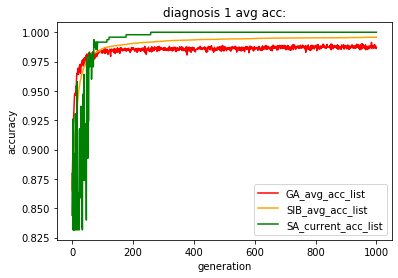

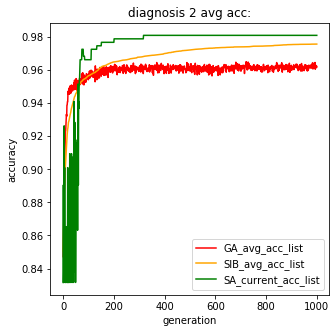

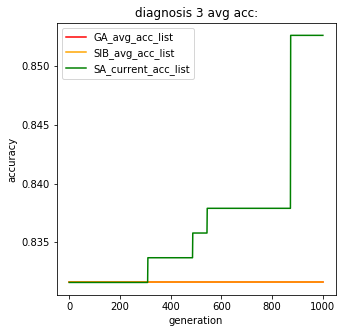

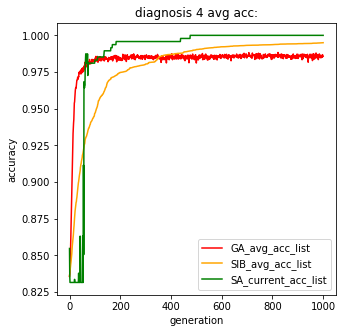

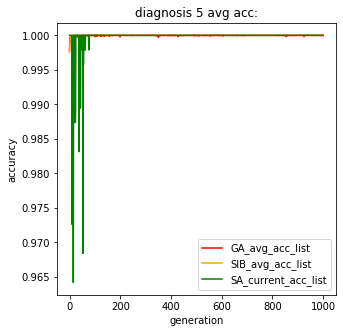

In [6]:
for i in range(5):
    x = list(range(len(GA_avg_acc_list[i*1001:(i+1)*1001])))
    plt.plot(x, GA_avg_acc_list[i*1001:(i+1)*1001], color='red', label='GA_avg_acc_list')
    plt.plot(x, SIB_avg_acc_list[i*1001:(i+1)*1001], color='orange', label='SIB_avg_acc_list')
    plt.plot(x, SA_current_acc_list[i*1001:(i+1)*1001], color='green', label='SA_current_acc_list')
    plt.legend()
    plt.rcParams["figure.figsize"] = (5,5)
    plt.title(f'diagnosis {i+1} avg acc:')
    plt.xlabel ('generation')
    plt.ylabel ('accuracy')
    plt.show()

# Best accuracy 的 progress diagrams

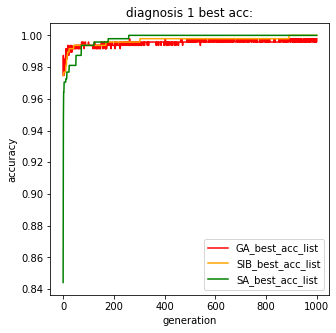

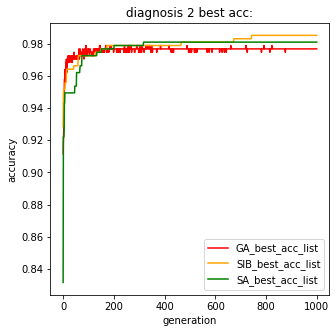

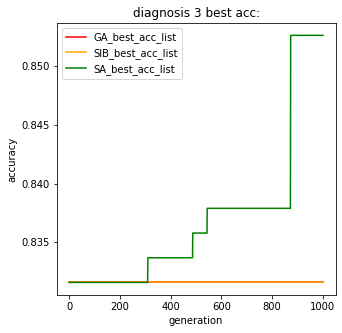

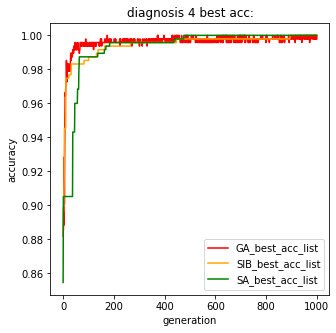

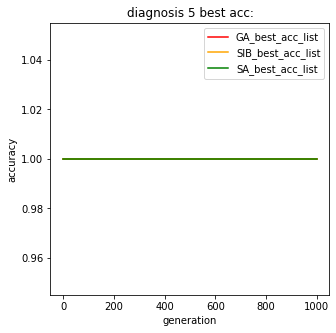

In [7]:
for i in range(5):
    x = list(range(len(GA_best_acc_list[i*1001:(i+1)*1001])))
    plt.plot(x, GA_best_acc_list[i*1001:(i+1)*1001], color='red', label='GA_best_acc_list')
    plt.plot(x, SIB_best_acc_list[i*1001:(i+1)*1001], color='orange', label='SIB_best_acc_list')
    plt.plot(x, SA_best_acc_list[i*1001:(i+1)*1001], color='green', label='SA_best_acc_list')
    plt.legend()
    plt.rcParams["figure.figsize"] = (5,5)
    plt.title(f'diagnosis {i+1} best acc:')
    plt.xlabel('generation')
    plt.ylabel('accuracy')
    plt.show()

# bonferroni method

In [13]:
final_best_acc_index_list = [1000, 2001, 3002, 4003, 5004]
final_best_acc_list = []
mean = []
method_list = ["GA", "SIB", "SA"]

final_best_acc_list = [[], [], []]
for i in range(5):
    final_best_acc_list[0].append(GA_best_acc_list[final_best_acc_index_list[i]])
    final_best_acc_list[1].append(SIB_best_acc_list[final_best_acc_index_list[i]])
    final_best_acc_list[2].append(SA_best_acc_list[final_best_acc_index_list[i]])


    
k = len(final_best_acc_list)         # k' = 3 (方法數)
ni = len(final_best_acc_list[0])     # ni = 5 (疾病數)
N = k * ni

SSE = 0
for i in range(len(final_best_acc_list)):
    mean.append(sum(final_best_acc_list[i])/len(final_best_acc_list[i]))
                
    for j in range(len(final_best_acc_list[i])):
        SSE += (final_best_acc_list[i][j] - mean[i]) ** 2

MSE = SSE / (N - k)

for i in range(len(method_list)):
    print(f'{method_list[i]} mean acc: {mean[i]}')
print()


t_compare = 2.7795 # t_(12, alpha / 2k')

for i in range(len(method_list)):
    for j in range(i+1, len(method_list)):
        t = (mean[i] - mean[j]) / (math.sqrt(MSE * 2 / ni))
        
        if t < t_compare:
             print(f'{method_list[i]} vs. {method_list[j]}, same !! (t = {t})')
        else: 
            print('different !!')



GA mean acc: 0.9608421052631579
SIB mean acc: 0.9633684210526315
SA mean acc: 0.9667368421052632

GA vs. SIB, same !! (t = -0.056650009233819215)
GA vs. SA, same !! (t = -0.13218335487891647)
SIB vs. SA, same !! (t = -0.07553334564509726)


# Testing data preprocessing

In [9]:
Data = pd.read_excel('./Midterm_Data/Data.xlsx') # training data
Data.fillna(Data.mean(), inplace=True)
Test2 = pd.read_excel('./Midterm_Data/Test2.xlsx') # testing data

# Data_bio_ratio
x = pd.DataFrame(index=range(Test2.shape[0]),columns=range(95))
for i in range(19):
    for j in range(5):
        if i < 9:
            x[i * 5 + j] = Test2[f'F0{i+1}'] / Test2[f'R0{j+1}']
        else:
            x[i * 5 + j] = Test2[f'F{i+1}'] / Test2[f'R0{j+1}']
            
one_way = x.to_numpy()
two_way = np.zeros((Test2.shape[0], 95 * 94 // 2))
count = 0
for i in range(one_way.shape[1]):
    for j in range(i+1, one_way.shape[1]):
        two_way[:, count] = one_way[:, i] * one_way[:, j]
        count += 1
x_test = np.hstack((one_way, two_way))
print("x_test.shape: ", x_test.shape)

# Data disease
y_test = Test2[['C01','C02','C03','C04','C05']].to_numpy().T
print("y_test.shape: ", y_test.shape)

x_test.shape:  (987, 4560)
y_test.shape:  (5, 987)


# Training data preprocessing

In [10]:
# Data_bio_ratio
x = pd.DataFrame(index=range(Data.shape[0]),columns=range(95))
for i in range(19):
    for j in range(5):
        if i < 9:
            x[i * 5 + j] = Data[f'F0{i+1}'] / Data[f'R0{j+1}']
        else:
            x[i * 5 + j] = Data[f'F{i+1}'] / Data[f'R0{j+1}']
            
one_way = x.to_numpy()
two_way = np.zeros((4240, 95 * 94 // 2))
count = 0
for i in range(one_way.shape[1]):
    for j in range(i+1, one_way.shape[1]):
        two_way[:, count] = one_way[:, i] * one_way[:, j]
        count += 1
x_train = np.hstack((one_way, two_way))
print("x_train.shape: ", x_train.shape)

# Data disease
y_train = Data[['C01','C02','C03','C04','C05']].to_numpy().T
print("y_train.shape: ", y_train.shape)

x_train.shape:  (4240, 4560)
y_train.shape:  (5, 4240)


# predict testing data and write to excel (using SA)

In [11]:
def predict(chromosome, d_num):
    clf = LogisticRegression(max_iter=400, tol=1, solver='saga').fit(x_train[:, chromosome], y_train[d_num])
    return clf.predict(x_test[:, chromosome])

In [12]:
y_test = []
for i in range(5):
    tmp = best_chromosome_list[i]['SA']
    Test2[f'C0{i+1}'] = predict(tmp, i)
    
Test2.to_excel("./Midterm_Data/Test2_result.xlsx", index=False) 